# Acea Smart Water Analytics: Exploratory Analysis
_Robert Webster_

In [1]:
import os
import re
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib notebook

# Data loading
fp = "../data/"
files = [f for f in os.listdir(fp) if f.split(".")[-1].lower() == "csv"]
datasets = dict()
for f in files:
    name = f.split(".")[0].lower()
    datasets[name] = pd.read_csv(os.path.join(fp, f)).set_index("Date")
variables = {key: df.columns.to_list() for key, df in datasets.items()}

The first thing I want to look at are the correlation matrices.  These will give an indication as to what relationships might be present between different features.

<IPython.core.display.Javascript object>


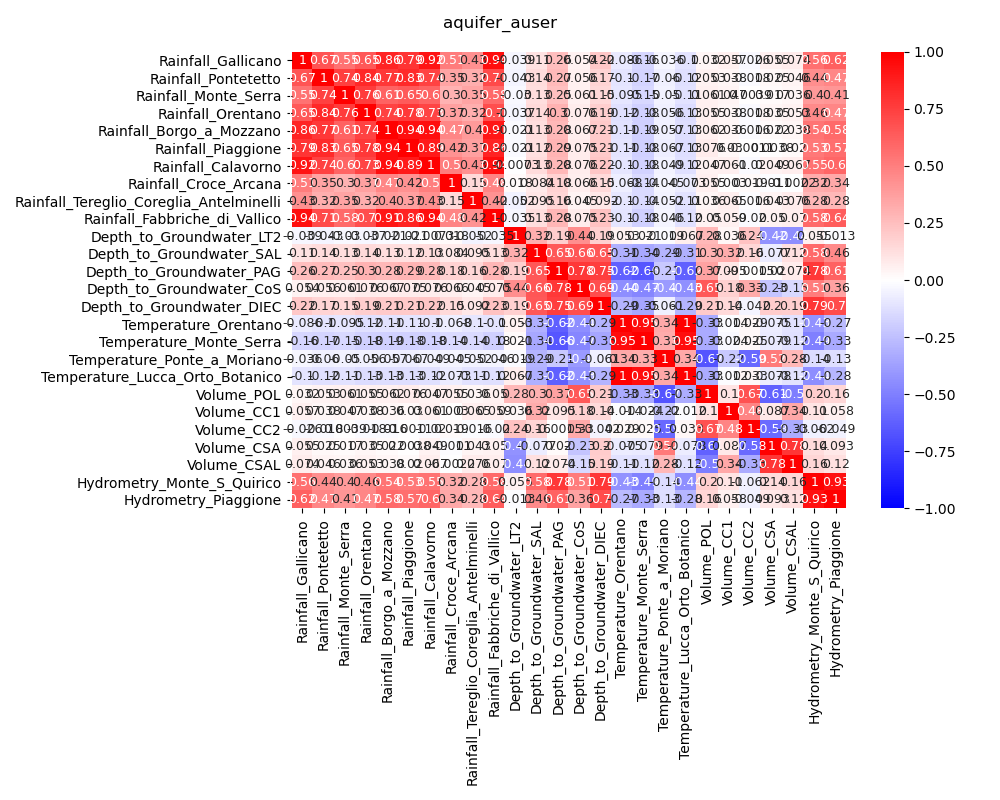

<IPython.core.display.Javascript object>


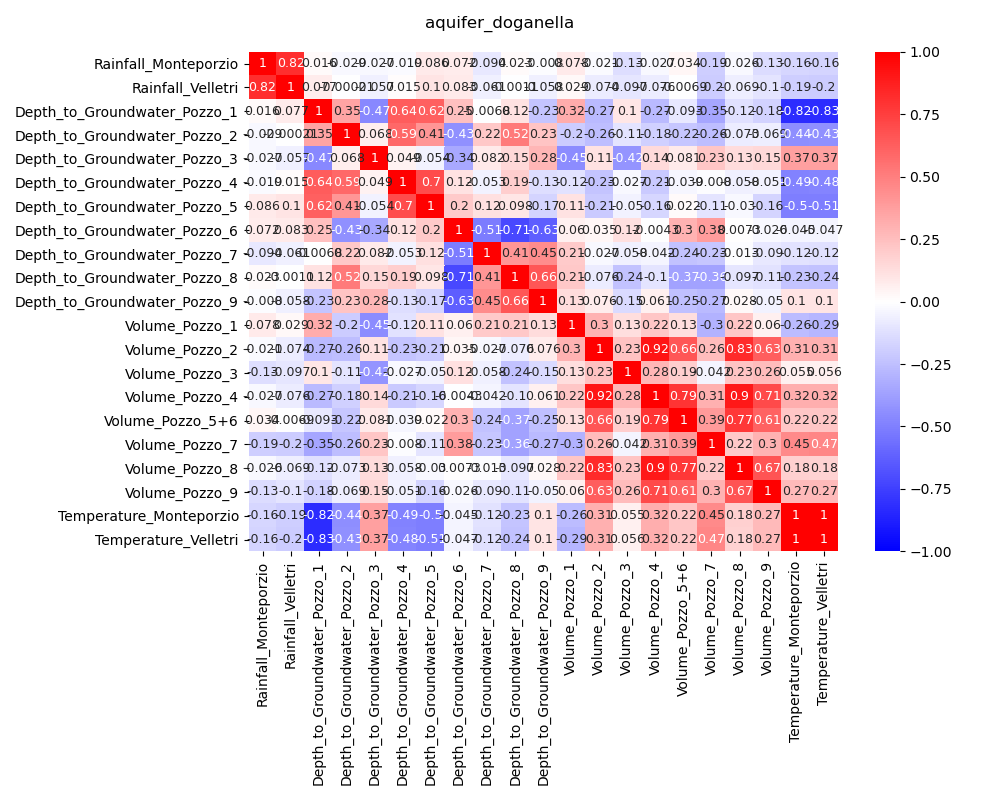

<IPython.core.display.Javascript object>


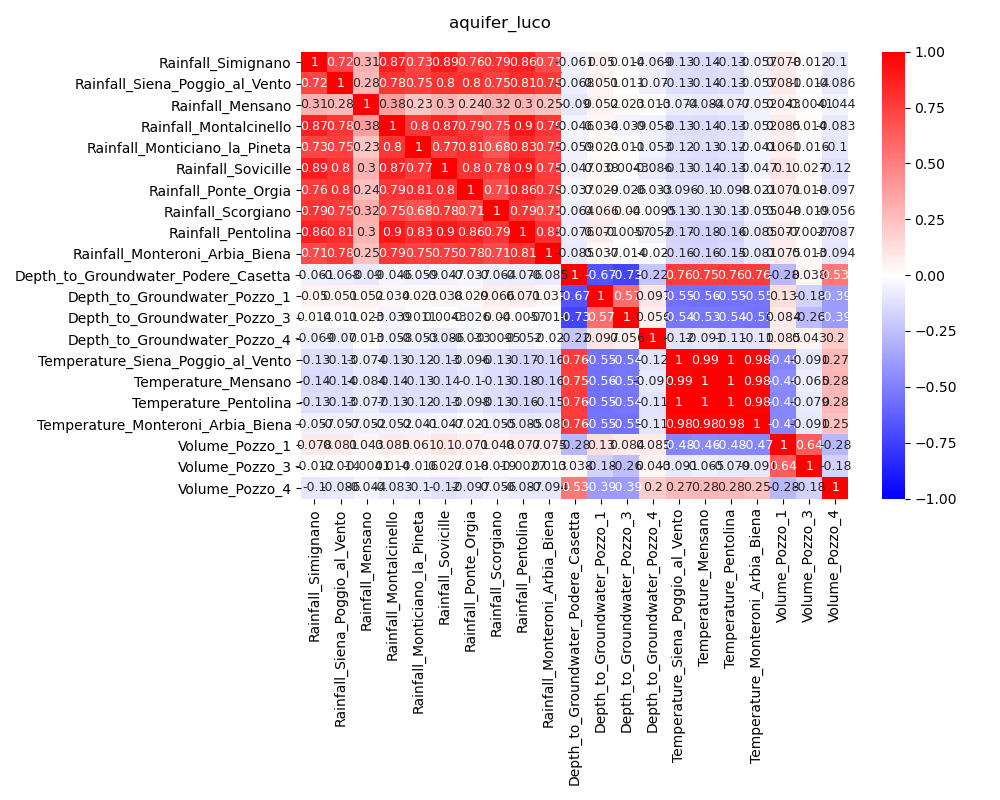

<IPython.core.display.Javascript object>


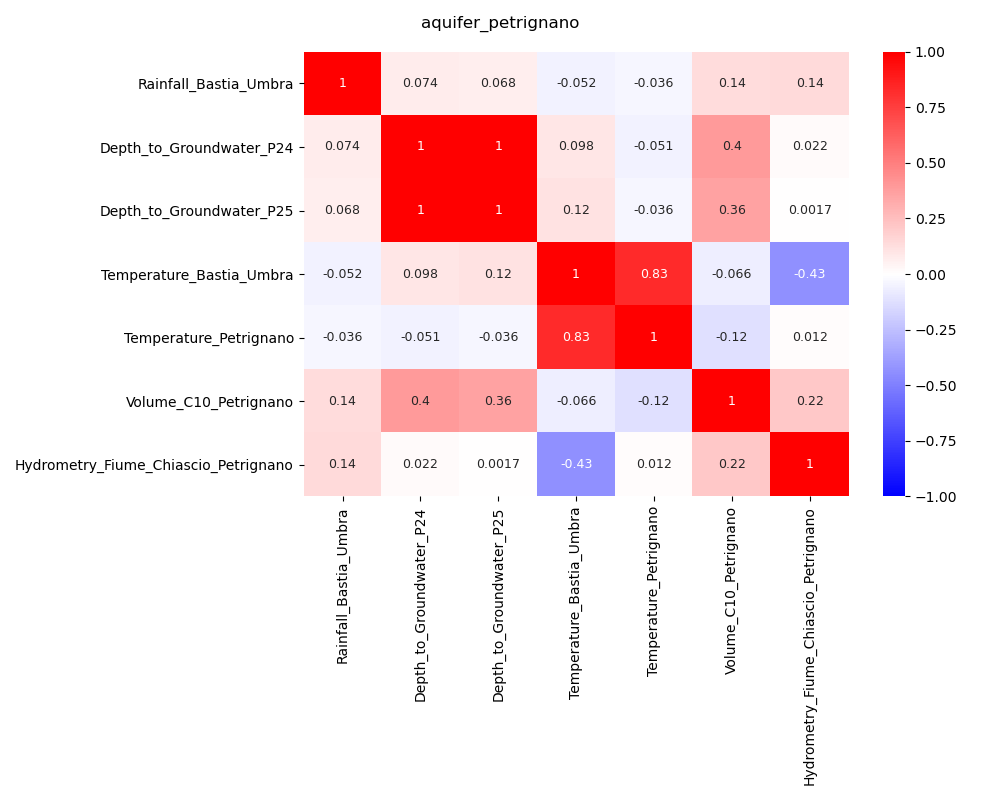

<IPython.core.display.Javascript object>


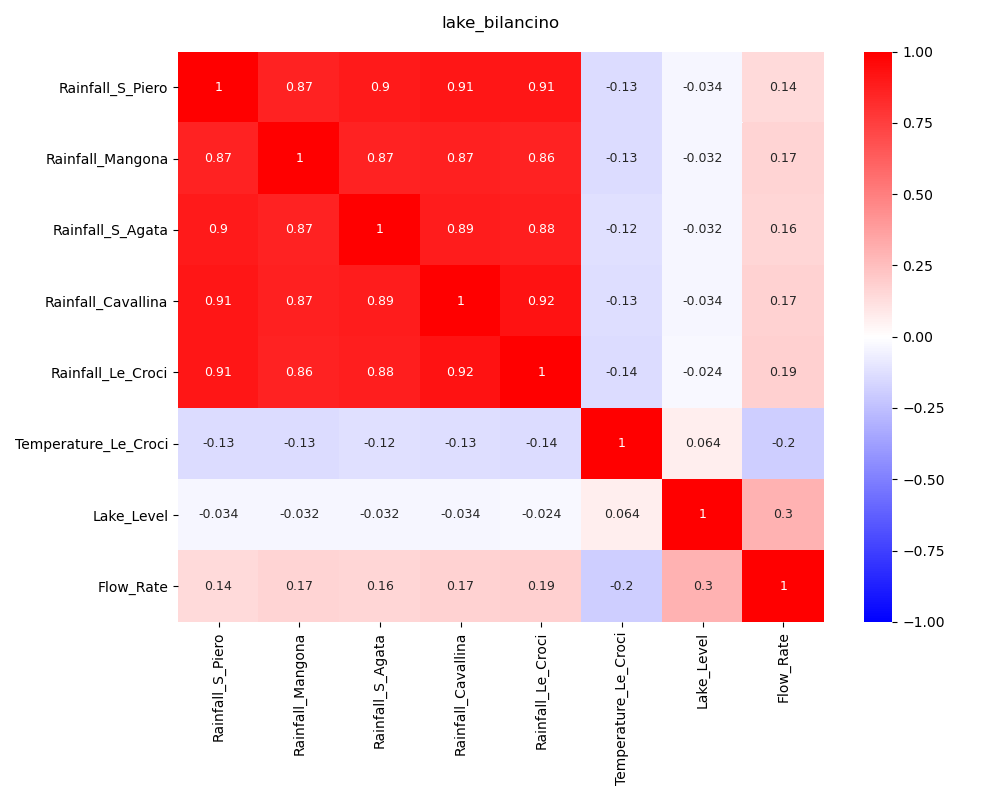

<IPython.core.display.Javascript object>


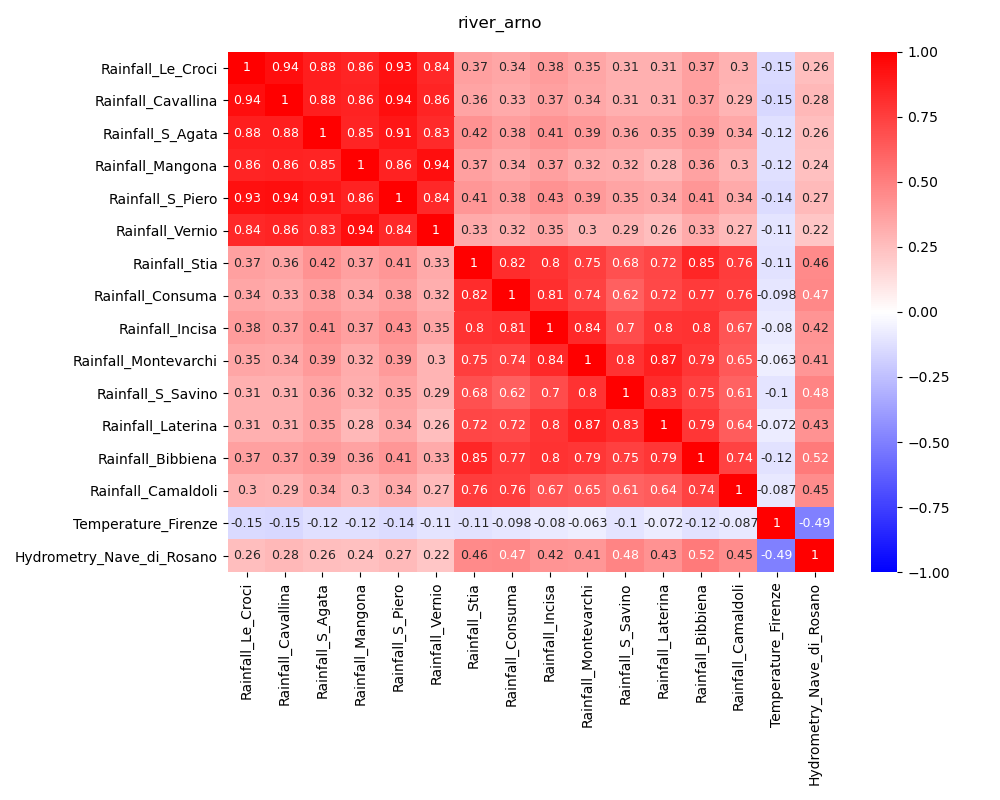

<IPython.core.display.Javascript object>


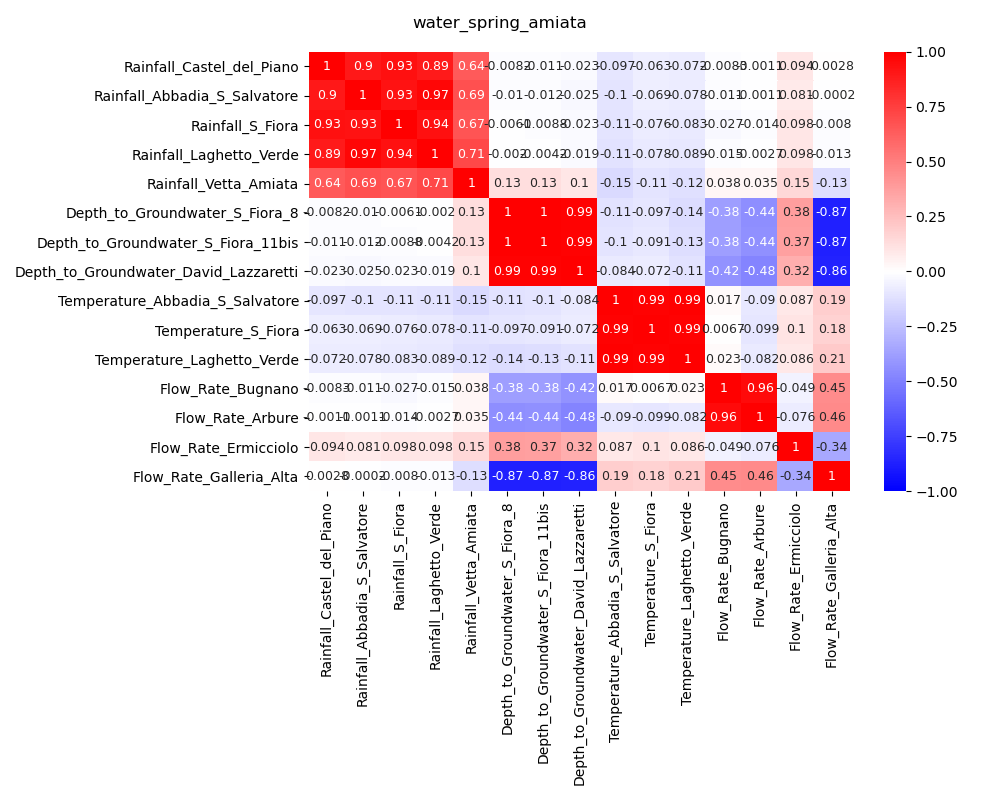

<IPython.core.display.Javascript object>


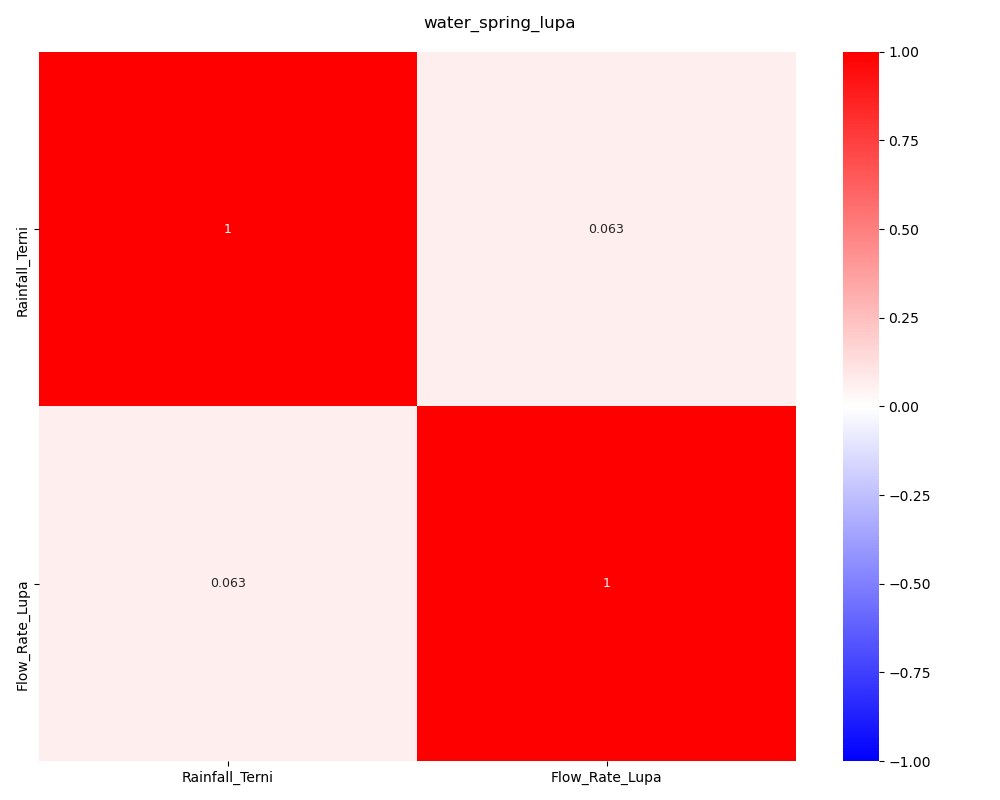

<IPython.core.display.Javascript object>


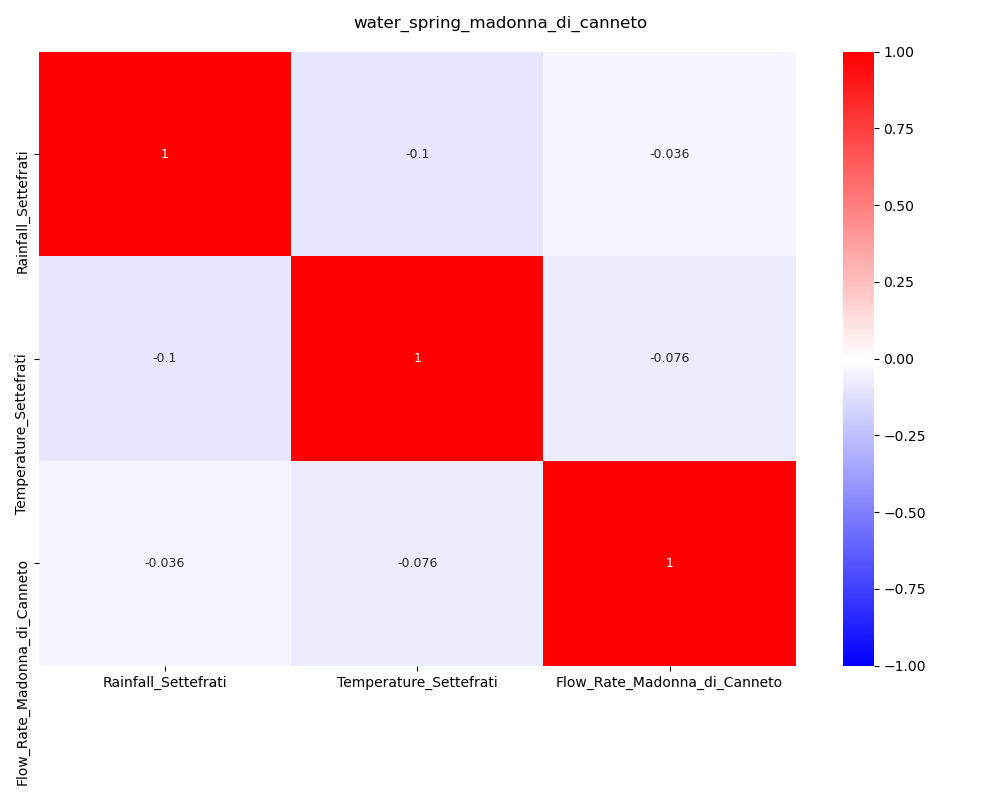

In [2]:
# Lets start with correlations
for dataset in datasets.keys():
    corr_matrix = datasets[dataset].dropna().corr()

    fig, ax = plt.subplots(1, 1, figsize = (10, 8), tight_layout=True)
    fig.suptitle(dataset)
    sns.heatmap(corr_matrix, annot=True, ax = ax, cmap = "bwr",
                vmin = -1, vmax = 1, annot_kws={"size": 9});

From the correlation plots, we see that features like different rainfalls tend to have a reasonably strong correlation with each other, and may merit being transformed into a new feature.  Lets have a look at the case of Water Spring Amiata to start.

<IPython.core.display.Javascript object>


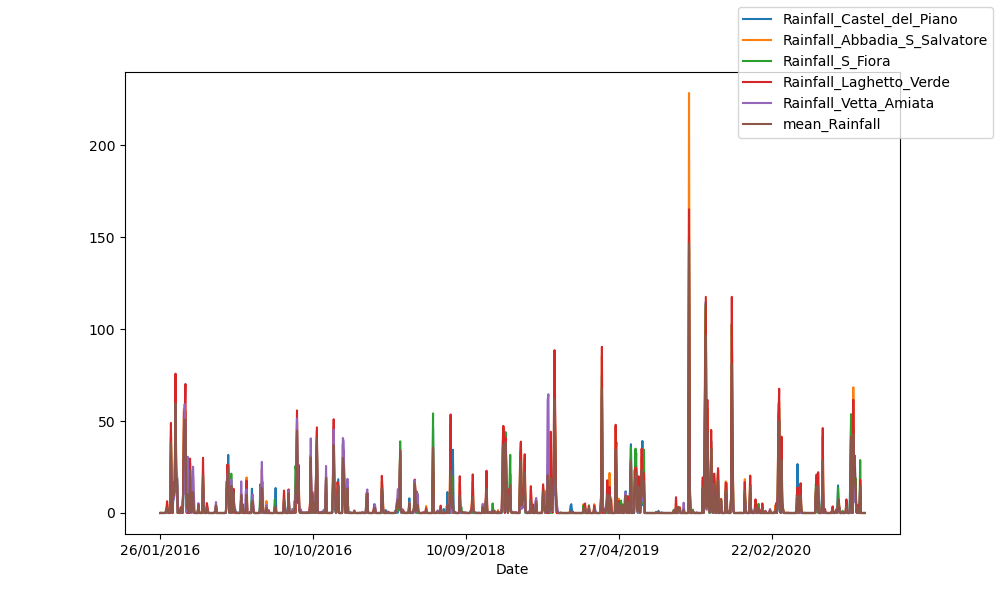

In [3]:
amiata = datasets["water_spring_amiata"].copy().dropna()
rainfall_cols = [feature for feature in amiata.columns.to_list() if "Rainfall" in feature]
amiata.loc[:, "mean_Rainfall"] = amiata[rainfall_cols].mean(axis=1)
fig, ax = plt.subplots(1,1, figsize=(10,6))
for feature in amiata.columns.to_list():
    if "Rainfall" in feature:
        amiata[feature].plot(ax=ax)
fig.legend();

Having condensed the rainfall features into a single variable, we re-examine the correlation table to find no strong connection between rainfall and the other features.

<IPython.core.display.Javascript object>


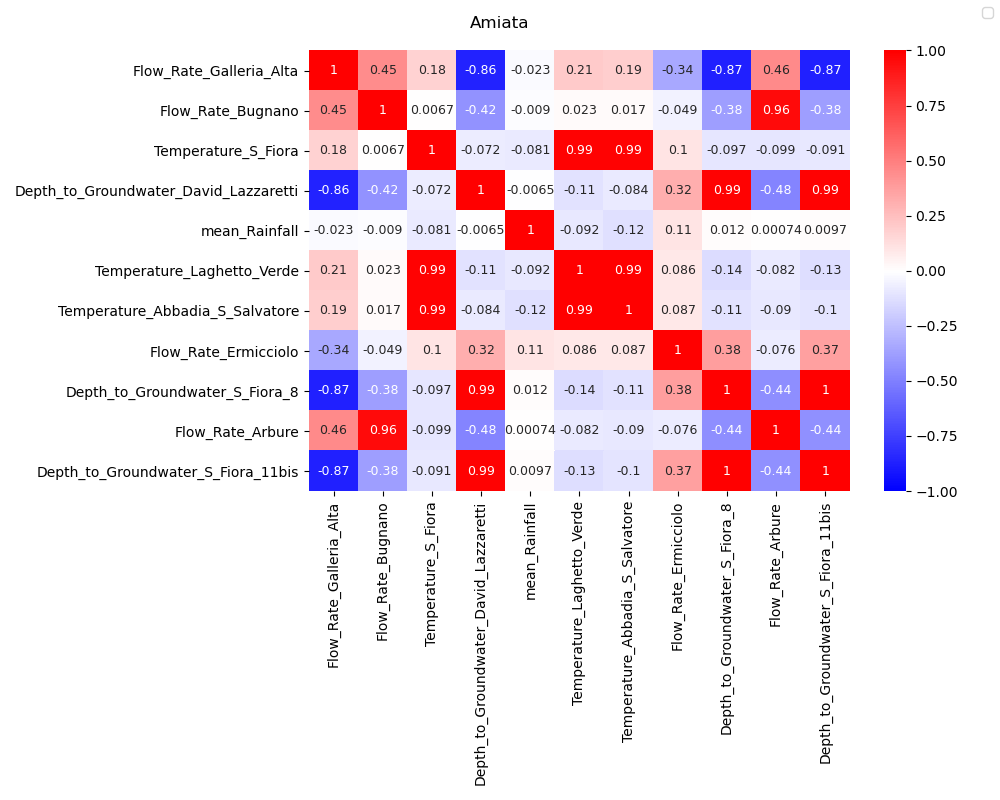

In [4]:
cols = list(set(amiata.columns.to_list()) - set(rainfall_cols))
corr_matrix = amiata[cols].corr()

fig, ax = plt.subplots(1, 1, figsize = (10,8), tight_layout=True)
fig.suptitle("Amiata")
sns.heatmap(corr_matrix, annot=True, ax = ax, cmap = "bwr",
            vmin = -1, vmax = 1, annot_kws={"size": 9});

Instead, flow rate seems to be more heavily influenced by depth to groundwater features, with a few strong anti-correlations present. Let's compare some of these features instead

<IPython.core.display.Javascript object>


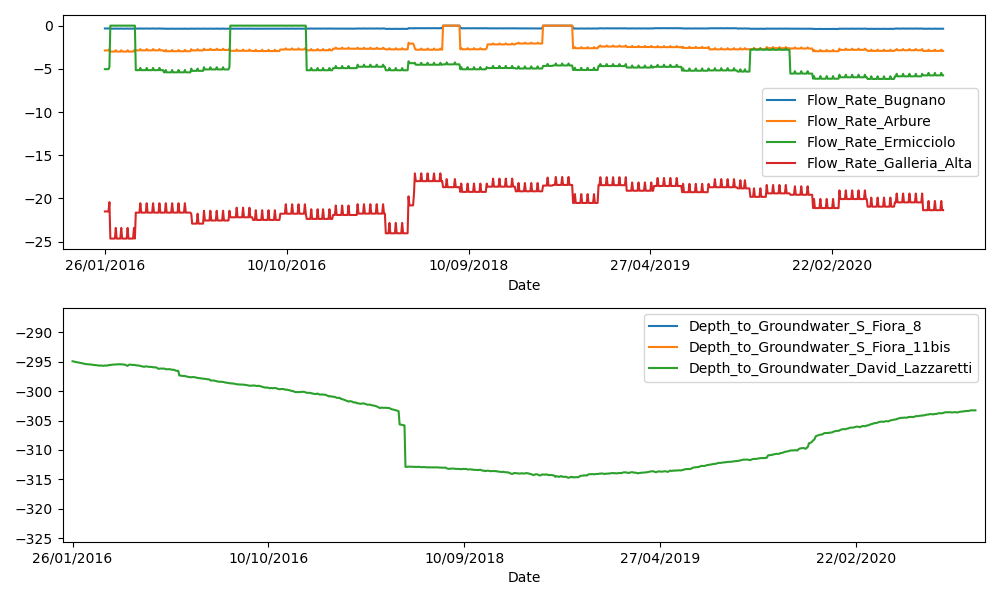

<AxesSubplot:xlabel='Date'>

In [16]:
fig, ax = plt.subplots(2,1, figsize=(10,6), tight_layout=True)

amiata[[feature for feature in amiata.columns.to_list() if "Flow" in feature]].plot(ax=ax[0])
amiata[[feature for feature in amiata.columns.to_list() if "Depth" in feature]].plot(ax=ax[1])

Comparing the graphs, a jump decrease in depth to groundwater sometime in 2017 is clearly influencing a jump in flow rate at the same time.  This is especially noticeable in the galleria alta data.

<IPython.core.display.Javascript object>


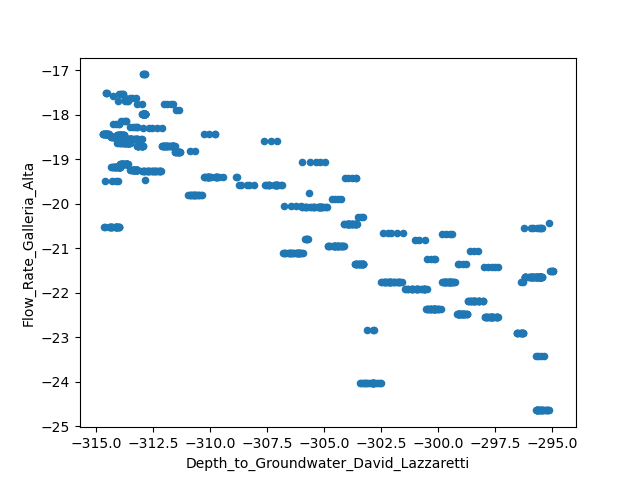

<AxesSubplot:xlabel='Depth_to_Groundwater_David_Lazzaretti', ylabel='Flow_Rate_Galleria_Alta'>

In [18]:
fig, ax = plt.subplots(1, 1)
amiata.plot(x="Depth_to_Groundwater_David_Lazzaretti", y="Flow_Rate_Galleria_Alta", ax=ax, kind="scatter");
amiata.plot()

Definitely a possible relationship here.  Will explore further soon.